In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Data_artigo/Data_20000

/content/drive/MyDrive/Data_artigo/Data_20000


In [ ]:
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data_artigo/Data_20000/Data_ZDT1'):
    for filename in filenames:
        os.path.join(dirname, filename)

print(filenames)

['DATA_0.1_5_0_0_Base.csv', 'DATA_0.3_5_0_0_Base.csv', 'DATA_0.1_5_0.25_0.5_Base.csv', 'DATA_0.5_5_0.25_0.5_Base.csv', 'DATA_0.5_5_0_0_Base.csv', 'DATA_0.7_5_0.25_0.5_Base.csv', 'DATA_0.7_5_0_0_Base.csv', 'DATA_0.9_5_0_0_Base.csv', 'DATA_0.1_5_0.25_1_Base.csv', 'DATA_0.3_5_0.25_0.5_Base.csv', 'DATA_0.5_5_0.25_1_Base.csv', 'DATA_0.7_5_0.25_1_Base.csv', 'DATA_0.9_5_0.25_1_Base.csv', 'DATA_0.9_5_0.25_0.5_Base.csv', 'DATA_0.1_5_0.5_0.5_Base.csv', 'DATA_0.3_5_0.25_1_Base.csv', 'DATA_0.9_5_0.5_0.5_Base.csv', 'DATA_0.3_5_0.5_1_Base.csv', 'DATA_0.3_5_0.5_0.5_Base.csv', 'DATA_0.5_5_0.5_0.5_Base.csv', 'DATA_0.1_5_0.5_1_Base.csv', 'DATA_0.7_5_0.5_0.5_Base.csv', 'DATA_0.1_7_0_0_Base.csv', 'DATA_0.5_5_EARN.csv', 'DATA_0.1_5_EARN.csv', 'DATA_0.5_5_0.5_1_Base.csv', 'DATA_0.9_5_EARN.csv', 'DATA_0.7_5_0.5_1_Base.csv', 'DATA_0.9_5_0.5_1_Base.csv', 'DATA_0.3_5_EARN.csv', 'DATA_0.1_7_0.25_0.5_Base.csv', 'DATA_0.7_5_EARN.csv', 'DATA_0.1_7_0.25_1_Base.csv', 'DATA_0.3_7_0_0_Base.csv', 'DATA_0.5_7_0_0_Base.cs

In [ ]:
import pandas as pd
import os
DATADIR = '/content/drive/MyDrive/Data_artigo/Data_20000'
CATEGORIES = ['Data_ZDT1_Seed', 'Data_ZDT2_Seed', 'Data_ZDT3_Seed', 'Data_ZDT4_Seed', 'Data_ZDT5_Seed', 'Data_ZDT6_Seed', 'Data_SPEA2_Seed']

data_base = []
for category in CATEGORIES:
    path= os.path.join(DATADIR, category)

    for arqv in os.listdir(path):
      array = pd.read_csv(os.path.join(path,arqv), index_col=0)
      data_base.append(array)

df = pd.concat(data_base, axis=0, ignore_index=True)
df

,IGD,RUN,r,c,m,v,EAR,ALGORITHM,PROBLEM,T_POP,N_GENS,TOT_AVALS,IVF_AVALS
0,0.505781,1,0.1,5,0.0,0.0,AR,IVF/SPEA2,ZDT1,100,10,1000,32
1,0.184318,1,0.1,5,0.0,0.0,AR,IVF/SPEA2,ZDT1,100,20,2000,64
2,0.067153,1,0.1,5,0.0,0.0,AR,IVF/SPEA2,ZDT1,100,30,3000,128
3,0.034055,1,0.1,5,0.0,0.0,AR,IVF/SPEA2,ZDT1,100,40,4000,160
4,0.022498,1,0.1,5,0.0,0.0,AR,IVF/SPEA2,ZDT1,100,50,5000,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652195,0.016934,30,-1.0,-1,-1.0,-1.0,Puro,SPEA2,ZDT6,100,160,16000,0
652196,0.013961,30,-1.0,-1,-1.0,-1.0,Puro,SPEA2,ZDT6,100,170,17000,0
652197,0.012100,30,-1.0,-1,-1.0,-1.0,Puro,SPEA2,ZDT6,100,180,18000,0
652198,0.010316,30,-1.0,-1,-1.0,-1.0,Puro,SPEA2,ZDT6,100,190,19000,0


In [3]:
import pandas as pd
df = pd.read_csv('Data_Geral_Seed.csv')

In [4]:
idx = df.groupby(['RUN', 'r', 'c', 'm', 'v', 'ALGORITHM', 'PROBLEM', 'EAR'])['IGD'].idxmin()
df_min = df.loc[idx]

In [ ]:
df_min.columns

Index(['Unnamed: 0', 'IGD', 'RUN', 'r', 'c', 'm', 'v', 'EAR', 'ALGORITHM',
       'PROBLEM', 'T_POP', 'N_GENS', 'TOT_AVALS', 'IVF_AVALS'],
      dtype='object')

In [ ]:
from tabulate import tabulate

def get_top_5_smallest(group):
    smallest = group.nsmallest(5, 'IGD')
    if 'Puro' in group['EAR'].values:
        puro_row = group[group['EAR'] == 'Puro'].nsmallest(1, 'IGD')
        smallest = pd.concat([smallest, puro_row])
    return smallest

# Agrupar por problema e aplicar a função para obter os 5 menores valores

df_relevant = df_min[['IGD', 'RUN', 'r', 'c', 'EAR', 'ALGORITHM', 'PROBLEM']]

top_5_smallest = df_relevant.groupby('PROBLEM').apply(get_top_5_smallest)

# Exibir os resultados
table = tabulate(top_5_smallest, headers='keys', tablefmt='latex')

# Imprimir o código LaTeX da tabela
print(table)

\begin{tabular}{lrrrrlll}
\hline
                  &        IGD &   RUN &    r &   c & EAR   & ALGORITHM   & PROBLEM   \\
\hline
 ('ZDT1', 6719)   & 0.0036597  &     6 &  0.1 &  11 & AR    & IVF/SPEA2   & ZDT1      \\
 ('ZDT1', 6879)   & 0.00374355 &    14 &  0.1 &  11 & AR    & IVF/SPEA2   & ZDT1      \\
 ('ZDT1', 51114)  & 0.00375319 &     6 &  0.5 &  11 & EARPA & IVF/SPEA2   & ZDT1      \\
 ('ZDT1', 14539)  & 0.00376892 &     7 &  0.1 &  19 & AR    & IVF/SPEA2   & ZDT1      \\
 ('ZDT1', 25454)  & 0.00378159 &    13 &  0.3 &   7 & AR    & IVF/SPEA2   & ZDT1      \\
 ('ZDT1', 648618) & 0.00414806 &     1 & -1   &  -1 & Puro  & SPEA2       & ZDT1      \\
 ('ZDT2', 203179) & 0.0035571  &    19 &  0.9 &  11 & EARX  & IVF/SPEA2   & ZDT2      \\
 ('ZDT2', 153739) & 0.00359535 &     7 &  0.5 &   5 & EART  & IVF/SPEA2   & ZDT2      \\
 ('ZDT2', 114136) & 0.00360346 &     7 &  0.1 &   7 & EARP  & IVF/SPEA2   & ZDT2      \\
 ('ZDT2', 203958) & 0.00362539 &    28 &  0.9 &  11 & EARP  & IVF/SPEA

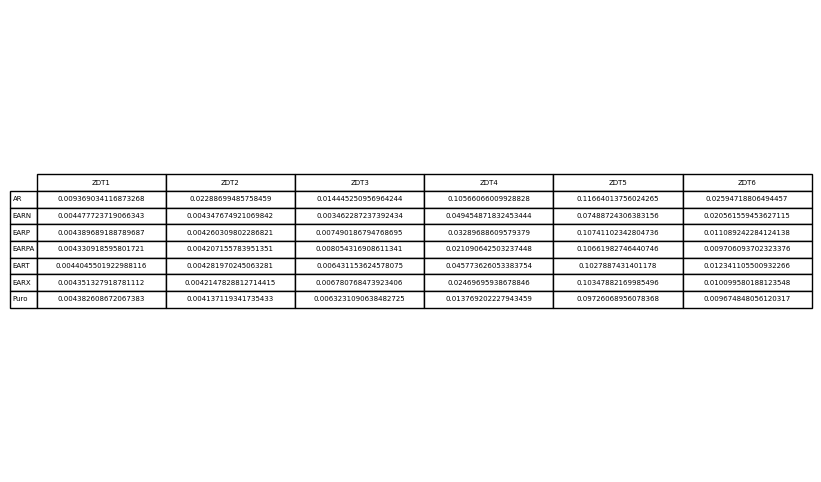

In [ ]:
import matplotlib.pyplot as plt
# Criar a tabela comparativa usando pivot_table
table = pd.pivot_table(df_min, values='IGD', index='EAR', columns='PROBLEM')

# Configurar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Criar a tabela usando a função table no eixo
ax.table(cellText=table.values,
         rowLabels=table.index,
         colLabels=table.columns,
         cellLoc='center',
         loc='center',
         fontsize=14)

# Remover eixos
ax.axis('off')

# Salvar a figura como imagem
plt.savefig('tabela_comparativa.png')

In [ ]:
import pandas as pd
from tabulate import tabulate
from scipy.stats import ranksums

# Definir o valor EAR 'Puro' para a comparação
ear_puro = 'Puro'

# Filtrar o DataFrame para a configuração com menor média em cada problema
df_min_mean = df_min.groupby(['r', 'c', 'm', 'v', 'PROBLEM', 'EAR'])['IGD'].mean().reset_index()

# Criar uma lista vazia para armazenar os resultados
resultados = []

# Realizar o teste de Wilcoxon Rank Sum para cada problema e configuração de menor média
for problema in df_min_mean['PROBLEM'].unique():
    # Filtrar os dados para o problema atual
    df_problema = df_min[(df_min['PROBLEM'] == problema) & (df_min['EAR'] != ear_puro)]
    df_problema.sort_values(by='IGD')

    # Obter a configuração com menor IGD
    idx_min_igd = df_problema.groupby(['EAR','r', 'c', 'm', 'v'])['IGD'].idxmin()[0]
    df_menor_config = df_problema.loc[idx_min_igd]

    # Filtrar os dados para o EAR 'Puro' no mesmo problema
    df_puro = df_min[(df_min['PROBLEM'] == problema) & (df_min['EAR'] == ear_puro)]

    # Comparar os resultados usando Wilcoxon Rank Sum Test
    stat, p_value = ranksums(df_menor_config['IGD'], df_puro['IGD'])

    # Adicionar os resultados à lista
    resultados.append([problema, df_menor_config['IGD'].values[0], df_puro['IGD'].mean(), stat, p_value])

# Exibir os resultados em uma tabela
headers = ['Problema', 'Menor IGD da Configuração', 'Média do Puro', 'Stat', 'p-value']
table = tabulate(resultados, headers=headers, floatfmt=".6f", tablefmt="github")
print(table)


Unnamed: 0          492
IGD            0.003927
RUN                  25
r                   0.1
c                     5
m                   0.0
v                   0.0
EAR                  AR
ALGORITHM     IVF/SPEA2
PROBLEM            ZDT1
T_POP               100
N_GENS              130
TOT_AVALS         13000
IVF_AVALS           192
Name: 492, dtype: object
| Problema   | Menor IGD da Configuração   | Média do Puro   | Stat   | p-value   |
|------------|-----------------------------|-----------------|--------|-----------|


In [5]:
df_media = df_min.groupby(['r', 'c', 'm', 'v', 'ALGORITHM', 'PROBLEM', 'EAR'])['IGD'].mean().reset_index()
#df_media = df_media[df_media['EAR'] != 'EARX']
df_media[df_media['EAR'] == 'EARX']

,r,c,m,v,ALGORITHM,PROBLEM,EAR,IGD
18,0.1,5,0.25,1.0,IVF/SPEA2,ZDT1,EARX,0.004315
19,0.1,5,0.25,1.0,IVF/SPEA2,ZDT2,EARX,0.004175
20,0.1,5,0.25,1.0,IVF/SPEA2,ZDT3,EARX,0.003077
21,0.1,5,0.25,1.0,IVF/SPEA2,ZDT4,EARX,0.011514
22,0.1,5,0.25,1.0,IVF/SPEA2,ZDT5,EARX,0.095684
...,...,...,...,...,...,...,...,...
1063,0.9,23,0.25,1.0,IVF/SPEA2,ZDT2,EARX,0.004308
1064,0.9,23,0.25,1.0,IVF/SPEA2,ZDT3,EARX,0.008003
1065,0.9,23,0.25,1.0,IVF/SPEA2,ZDT4,EARX,0.059592
1066,0.9,23,0.25,1.0,IVF/SPEA2,ZDT5,EARX,0.100066


In [ ]:
df_media_geral = df_max.groupby(['r', 'c', 'm', 'v', 'ALGORITHM', 'EAR'])['IGD'].mean().reset_index()
df_media_geral.sort_values(by='IGD')

NameError: ignored

In [ ]:
df_media[df_media['PROBLEM'] == 'ZDT5'].sort_values(by='IGD')[df_media['EAR'] == 'Puro']

<ipython-input-7-7d96b5abaf90>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_media[df_media['PROBLEM'] == 'ZDT5'].sort_values(by='IGD')[df_media['EAR'] == 'Puro']


,r,c,m,v,ALGORITHM,PROBLEM,EAR,IGD
4,-1.0,-1,-1.0,-1.0,SPEA2,ZDT5,Puro,0.100667


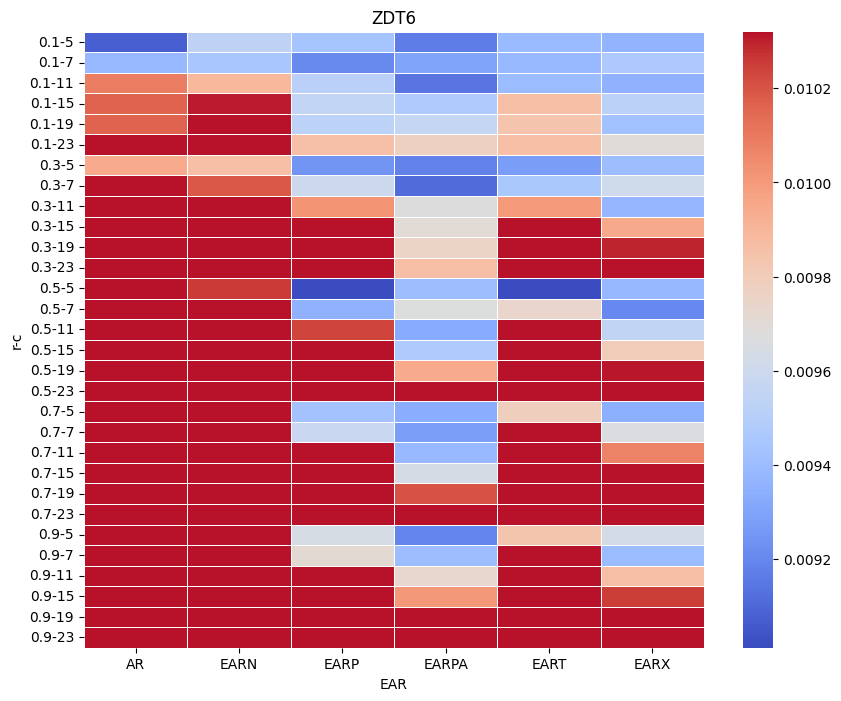

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
igd_centro = df_media[(df_media['PROBLEM'] == 'ZDT6') & (df_media['EAR'] == 'Puro')]['IGD'].values[0]
df_pivot = df_media[(df_media['PROBLEM'] == 'ZDT6') & (df_media['EAR'] != 'Puro')].pivot(index=['r', 'c'], columns='EAR', values='IGD')

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df_pivot, cmap='coolwarm', center=igd_centro, annot=False, fmt='.2', linewidths=.5, vmax = igd_centro+ igd_centro/15, ax=ax)
plt.title("ZDT6")
plt.show()

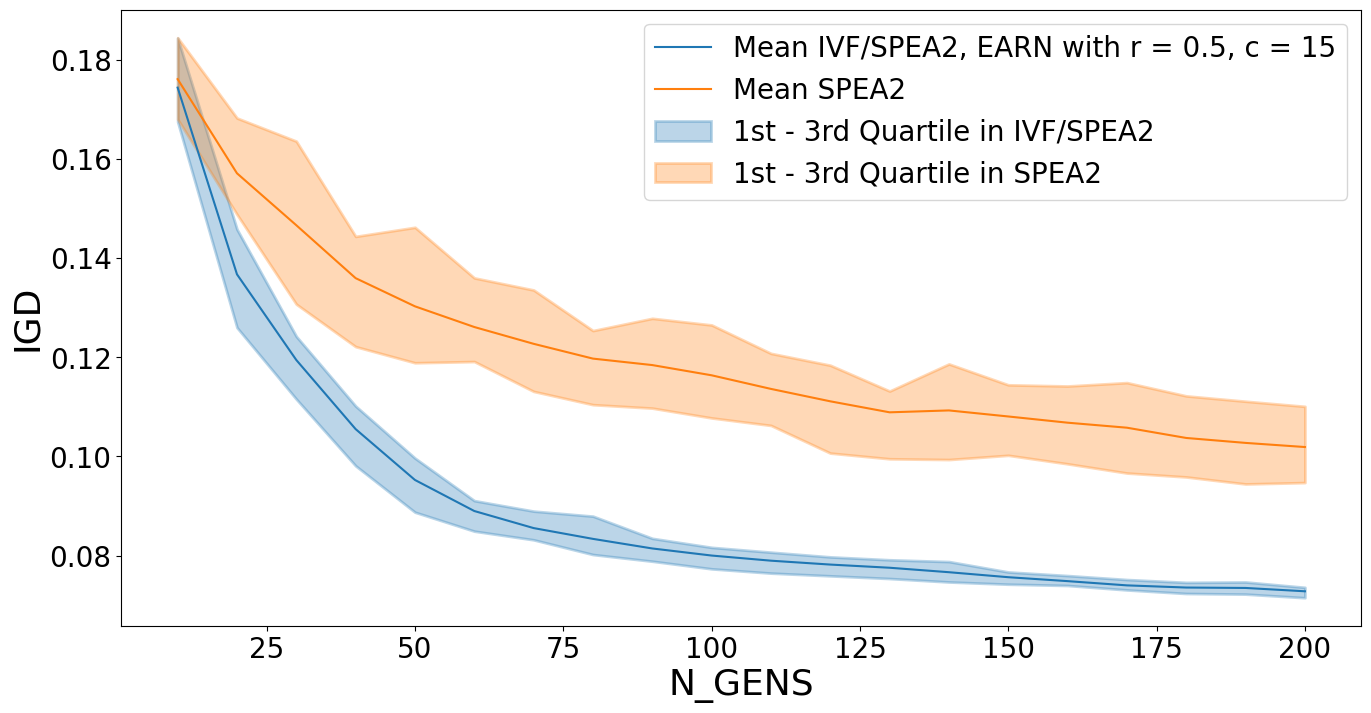

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

min_config = df_media[df_media['PROBLEM'] == 'ZDT5'].sort_values(by='IGD').iloc[0]

df_box = df[(df['PROBLEM'] == 'ZDT5')]
df_box = df_box[df_box['ALGORITHM'] == 'IVF/SPEA2']

mask = (df_box['r'] == min_config['r']) & (df_box['c'] == min_config['c']) & \
       (df_box['m'] == min_config['m']) & (df_box['v'] == min_config['v'])

df_box = df_box[mask]
df_box_p = df[(df['PROBLEM'] == 'ZDT5')]
df_box_p = df_box_p[df_box_p['ALGORITHM'] == 'SPEA2']

r = min_config['r']
c = min_config['c']
earu = min_config['EAR']

str_config = f'{earu} with r = {r}, c = {c}'

unique_gens = df_box['N_GENS'].unique()
igd_by_gens = []
igd_by_gens_p = []

for gen in unique_gens:
    igd_list = df_box.loc[df_box['N_GENS'] == gen]['IGD'].tolist()
    igd_list_p = df_box_p.loc[df_box_p['N_GENS'] == gen]['IGD'].tolist()
    igd_by_gens.append(igd_list)
    igd_by_gens_p.append(igd_list_p)

medians = [np.median(igd_list) for igd_list in igd_by_gens]
q1s = [np.quantile(igd_list, 0.25) for igd_list in igd_by_gens]
q3s = [np.quantile(igd_list, 0.75) for igd_list in igd_by_gens]
means = [np.mean(igd_list) for igd_list in igd_by_gens]

medians_p = [np.median(igd_list_p) for igd_list_p in igd_by_gens_p]
q1s_p = [np.quantile(igd_list_p, 0.25) for igd_list_p in igd_by_gens_p]
q3s_p = [np.quantile(igd_list_p, 0.75) for igd_list_p in igd_by_gens_p]
means_p = [np.mean(igd_list_p) for igd_list_p in igd_by_gens_p]

fig, ax = plt.subplots(figsize=(10*1.6, 8))

plt.rcParams.update({'font.size': 18})

ax.plot(unique_gens, means, label=f'Mean IVF/SPEA2, {str_config}')
ax.plot(unique_gens, means_p, label='Mean SPEA2')

ax.fill_between(unique_gens, q1s, q3s, alpha=0.3, color='tab:blue', edgecolor='tab:blue', linewidths=2, label='1st - 3rd Quartile in IVF/SPEA2')
ax.fill_between(unique_gens, q1s_p, q3s_p, alpha=0.3, color='tab:orange', edgecolor='tab:orange', linewidths=2, label='1st - 3rd Quartile in SPEA2')

ax.set_xlabel('N_GENS', fontsize=26)
ax.set_ylabel('IGD', fontsize=26)
ax.legend(fontsize=20)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.savefig("Convergence_ZDT5.pdf")
plt.show()


In [ ]:
import pandas as pd

# Selecionar as 5 menores médias de cada problema ZDT1 a ZDT6
menores_medias = df_media[df_media['PROBLEM'].str.startswith('ZDT')].sort_values(by='IGD').groupby('PROBLEM').head(5)

# Adicionar a média retornada por ['EAR'] == 'Puro' para cada problema
for problem in ['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6']:
    media_puro = df_media[(df_media['PROBLEM'] == problem) & (df_media['EAR'] == 'Puro')]
    menores_medias = menores_medias.append(media_puro)
# Ordenar a tabela final por problema e IGD
menores_medias = menores_medias.sort_values(by=['PROBLEM', 'IGD'])

menores_medias = menores_medias.drop("m", axis=1)
menores_medias = menores_medias.drop("v", axis=1)

print(menores_medias)

# Criar tabela em LaTeX
tabela_latex = menores_medias.to_latex(index=False)

print(tabela_latex)


       r   c  ALGORITHM PROBLEM    EAR       IGD
144  0.1  15  IVF/SPEA2    ZDT1   EART  0.004247
228  0.3   5  IVF/SPEA2    ZDT1  EARPA  0.004275
354  0.3  15  IVF/SPEA2    ZDT1   EARP  0.004277
42   0.1   7  IVF/SPEA2    ZDT1     AR  0.004278
462  0.5   5  IVF/SPEA2    ZDT1   EARP  0.004280
0   -1.0  -1      SPEA2    ZDT1   Puro  0.004346
469  0.5   5  IVF/SPEA2    ZDT2   EART  0.004121
55   0.1   7  IVF/SPEA2    ZDT2   EARX  0.004129
139  0.1  15  IVF/SPEA2    ZDT2   EARP  0.004137
229  0.3   5  IVF/SPEA2    ZDT2  EARPA  0.004143
325  0.3  11  IVF/SPEA2    ZDT2   EART  0.004144
1   -1.0  -1      SPEA2    ZDT2   Puro  0.004173
494  0.5   7  IVF/SPEA2    ZDT3   EARN  0.003058
26   0.1   5  IVF/SPEA2    ZDT3   EARN  0.003061
170  0.1  19  IVF/SPEA2    ZDT3   EARN  0.003074
20   0.1   5  IVF/SPEA2    ZDT3   EARX  0.003077
458  0.5   5  IVF/SPEA2    ZDT3   EARN  0.003077
2   -1.0  -1      SPEA2    ZDT3   Puro  0.006356
99   0.1  11  IVF/SPEA2    ZDT4   EARN  0.009184
243  0.3   5  IVF/SP

<ipython-input-13-fb668e7653cc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  menores_medias = menores_medias.append(media_puro)
<ipython-input-13-fb668e7653cc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  menores_medias = menores_medias.append(media_puro)
<ipython-input-13-fb668e7653cc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  menores_medias = menores_medias.append(media_puro)
<ipython-input-13-fb668e7653cc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  menores_medias = menores_medias.append(media_puro)
<ipython-input-13-fb668e7653cc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pan

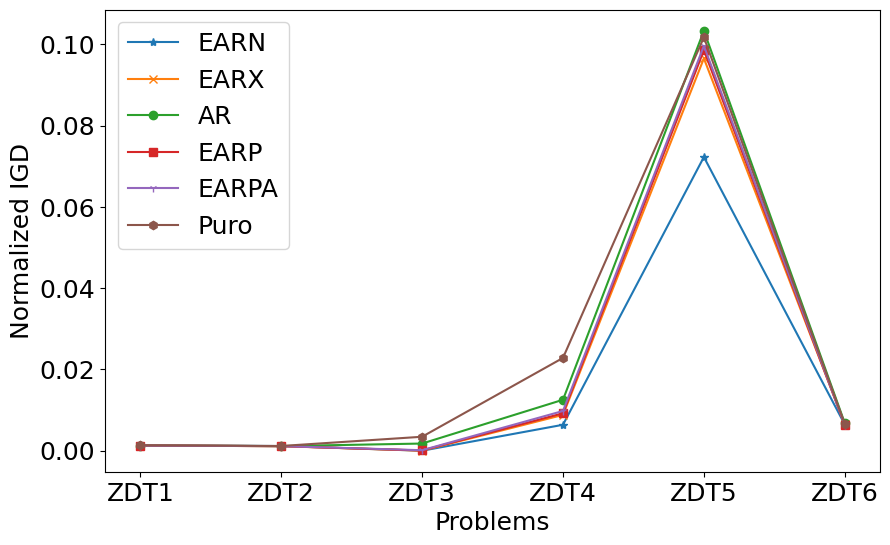

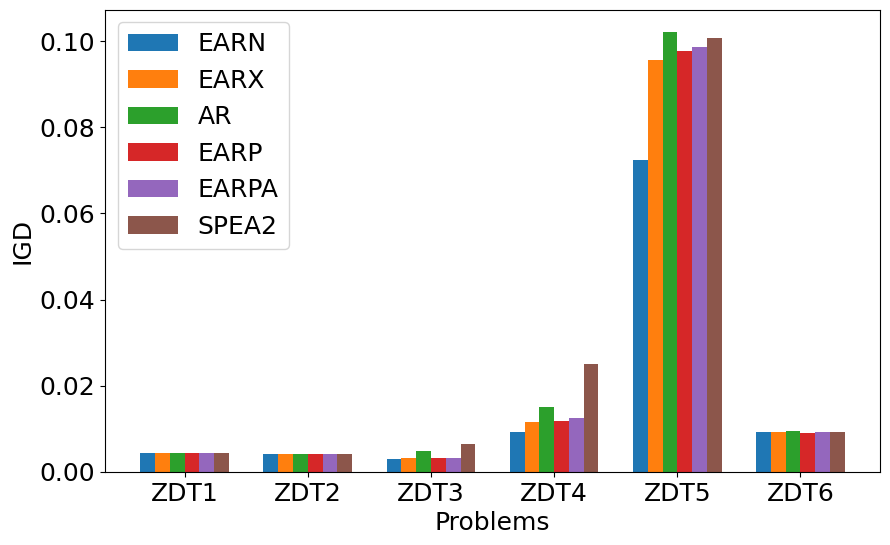

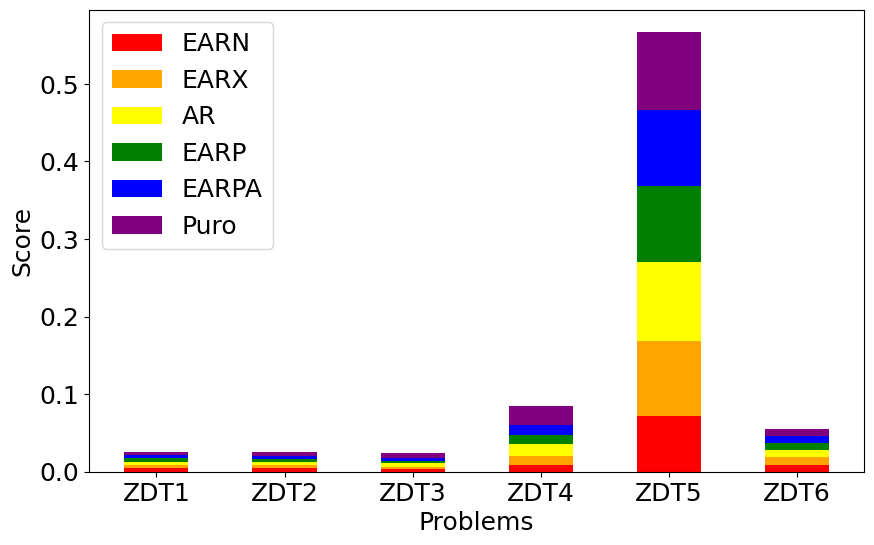

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

EARN = []
EARX = []
AR = []
EARP = []
EARPA = []
PURO = []

for i in range(6):
    EARN.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'EARN')].sort_values(by='IGD').iloc[0]['IGD'])
    EARX.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'EARX')].sort_values(by='IGD').iloc[0]['IGD'])
    AR.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'AR')].sort_values(by='IGD').iloc[0]['IGD'])
    EARP.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'EARP')].sort_values(by='IGD').iloc[0]['IGD'])
    EARPA.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'EARPA')].sort_values(by='IGD').iloc[0]['IGD'])
    PURO.append(df_media[(df_media['PROBLEM'] == f'ZDT{i+1}') & (df_media['EAR'] == 'Puro')].sort_values(by='IGD').iloc[0]['IGD'])


min_value = df_media['IGD'].min()
max_value = df_media['IGD'].max()
normalized_EARN = [(value - min_value)/(max_value - min_value) for value in EARN]
normalized_EARX = [(value - min_value)/(max_value - min_value) for value in EARX]
normalized_AR = [(value - min_value)/(max_value - min_value) for value in AR]
normalized_EARP = [(value - min_value)/(max_value - min_value) for value in EARP]
normalized_EARPA = [(value - min_value)/(max_value - min_value) for value in EARPA]
normalized_PURO = [(value - min_value)/(max_value - min_value) for value in PURO]




plt.figure(figsize=(10, 6))
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_EARN, '-*', label='EARN')
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_EARX, '-x', label='EARX')
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_AR, '-o', label='AR')
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_EARP, '-s', label='EARP')
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_EARPA, '-1', label='EARPA')
plt.plot(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'], normalized_PURO, '-h', label='Puro')
plt.legend()
plt.xlabel('Problems')
plt.ylabel('Normalized IGD')
plt.show()


fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.12

r1 = np.arange(len(EARN))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

ax.bar(r1, EARN, width=bar_width, label='EARN')
ax.bar(r2, EARX, width=bar_width, label='EARX')
ax.bar(r3, AR, width=bar_width, label='AR')
ax.bar(r4, EARP, width=bar_width, label='EARP')
ax.bar(r5, EARPA, width=bar_width, label='EARPA')
ax.bar(r6, PURO, width=bar_width, label='SPEA2')

ax.set_xticks([r + bar_width*2.5 for r in range(len(EARN))])
ax.set_xticklabels(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'])

ax.set_xlabel('Problems')
ax.set_ylabel('IGD')
ax.legend()

plt.show()


# Exemplo de dados de pontuação média para cada algoritmo em cada problema
data = {'Problem': ['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6'],
        'EARN': EARN,
        'EARX':EARX,
        'AR': AR,
        'EARP': EARP,
        'EARPA': EARPA,
        'Puro': PURO}
df = pd.DataFrame(data)

# Configurações de plotagem
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
width = 0.5

# Gerando o gráfico
fig, ax = plt.subplots(figsize=(10,6))
for i, col in enumerate(df.columns[1:]):
    bottom = np.sum(df[df.columns[1:i+1]].values, axis=1)
    ax.bar(df['Problem'], df[col], bottom=bottom, width=width, color=colors[i], label=col)
ax.set_xlabel('Problems')
ax.set_ylabel('Score')
ax.legend()
plt.show()


In [ ]:
df_min[(df_min['EAR'] == 'AR') & (df_min['PROBLEM'] == 'ZDT1')].columns



Index(['IGD', 'RUN', 'r', 'c', 'm', 'v', 'EAR', 'ALGORITHM', 'PROBLEM',
       'T_POP', 'N_GENS', 'TOT_AVALS', 'IVF_AVALS'],
      dtype='object')

        EAR  IGD_Mean PROBLEM       p_value  dif         mag       val    r  \
1        AR  0.004278    ZDT1  3.578268e-02  0.0       small -0.342222  0.1   
43     EARN  0.004402    ZDT1  8.634645e-02  0.5       small -0.628889  0.5   
70     EARP  0.004397    ZDT1  6.899014e-02  0.5       small -0.636667  0.3   
99    EARPA  0.004285    ZDT1  4.132536e-02  0.0       small -0.346667  0.3   
122    EART  0.004288    ZDT1  4.132536e-02  0.0       small -0.346667  0.1   
171    EARX  0.004399    ZDT1  9.775106e-02  0.5       small -0.624444  0.7   
193      AR  0.004246    ZDT2  7.851865e-02  0.5       small -0.632222  0.5   
229    EARN  0.004248    ZDT2  1.205750e-01  0.5       small -0.616667  0.7   
265    EARP  0.004230    ZDT2  8.106111e-02  0.5       small -0.631111  0.9   
297   EARPA  0.004243    ZDT2  6.248512e-02  0.5       small -0.640000  0.9   
319    EART  0.004254    ZDT2  6.248512e-02  0.5       small -0.640000  0.7   
347    EARX  0.004234    ZDT2  1.103286e-01  0.5    

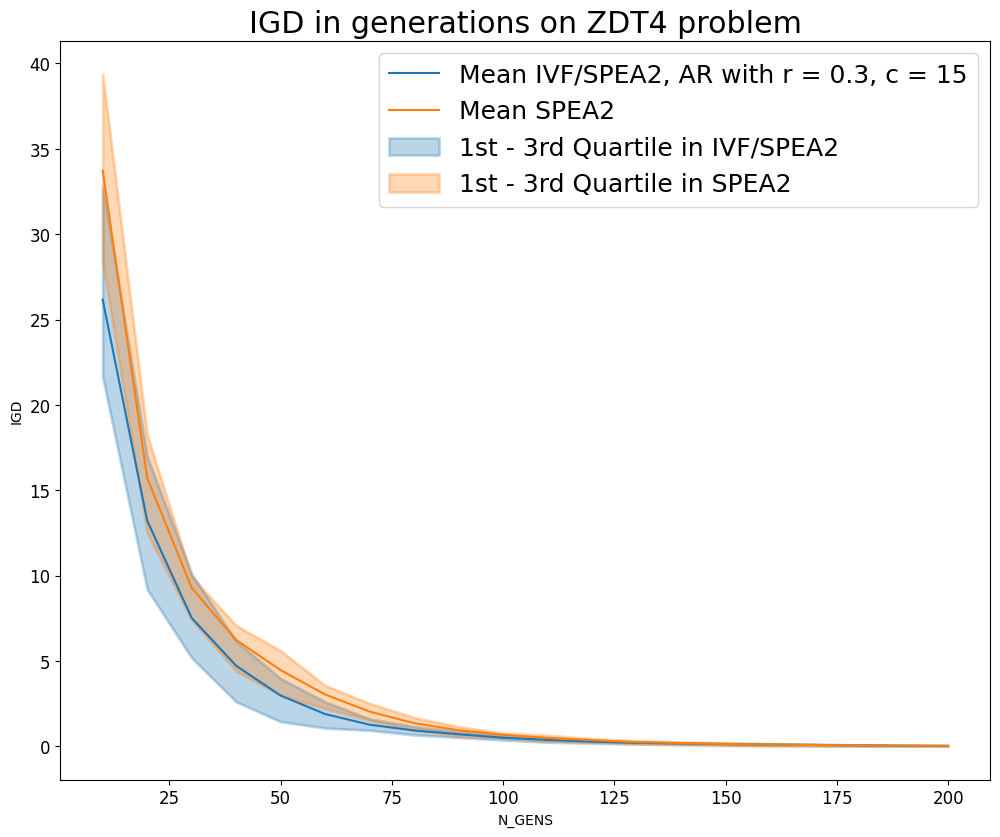

In [9]:
import pandas as pd
from scipy.stats import ranksums
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read the data into a pandas DataFrame
df_t = df_min.copy()

# group the data by relevant columns except 'EAR'
groups = df_t[df_t['EAR'] != 'Puro'].groupby(['PROBLEM', 'EAR', 'ALGORITHM', 'r', 'c', 'm', 'v'])

# get the subset of the data where EAR = 'Puro'
puro_data = df_t[df_t['EAR'] == 'Puro']

results = pd.DataFrame(columns=['EAR', 'IGD_Mean', 'PROBLEM', 'p_value', 'dif', 'mag', 'val','r', 'c', 'm', 'v'])

# iterate over the groups and perform the rank-sum test
for group, data in groups:
    #print(group)
    #print(puro_data[puro_data['PROBLEM'] == data['PROBLEM'].unique()[0]]['IGD'].values.tolist())
    #break
    statistic, pvalue = ranksums(data['IGD'].values.tolist(),  puro_data[puro_data['PROBLEM'] == data['PROBLEM'].unique()[0]]['IGD'].values.tolist())
    pvalue_puro = ranksums(data['IGD'].values.tolist(), puro_data[puro_data['PROBLEM'] == data['PROBLEM'].unique()[0]]['IGD'].values.tolist())[1]
    igdmean =  np.mean(data['IGD'].values.tolist())

    igdmeanp = np.mean(puro_data[puro_data['PROBLEM'] == data['PROBLEM'].unique()[0]]['IGD'].values.tolist())

    val, vda = VD_A(data['IGD'].values.tolist(),  puro_data[puro_data['PROBLEM'] == data['PROBLEM'].unique()[0]]['IGD'].values.tolist())

    if igdmean < igdmeanp  and pvalue < 0.05:
      new_row = {'EAR': group[1], 'IGD_Mean': igdmean, 'PROBLEM': group[0], 'p_value': pvalue, 'dif': 0, 'mag':vda, 'val':val*-1, 'r':group[3], 'c':group[4], 'm':group[5], 'v':group[6]}
      #print(f"Wilcoxon rank-sum test for {group}: p-value = {pvalue:.4f}, p-value vs. Puro = {pvalue_puro:.4f}")

    elif( igdmean > igdmeanp and pvalue < 0.05):
      new_row = {'EAR': group[1], 'IGD_Mean': igdmean, 'PROBLEM': group[0], 'p_value': pvalue, 'dif': 1, 'mag':vda, 'val':val*-1, 'r':group[3], 'c':group[4], 'm':group[5], 'v':group[6]}

    else:
      new_row = {'EAR': group[1], 'IGD_Mean': igdmean, 'PROBLEM': group[0], 'p_value': pvalue, 'dif': 0.5, 'mag':vda, 'val':val*-1, 'r':group[3], 'c':group[4], 'm':group[5], 'v':group[6]}

    results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# sort the results by PROBLEM and EAR
results = results.sort_values(by=['PROBLEM', 'EAR', 'dif', 'val'])

results.drop_duplicates(subset=['EAR', 'PROBLEM'], keep='first', inplace=True)
# print the results
print(results)


min_config = results[results['PROBLEM'] == 'ZDT4'].sort_values(by='val').iloc[0]

print(min_config)

df_box = df[(df['PROBLEM'] == 'ZDT4')]
df_box = df_box[df_box['ALGORITHM'] == 'IVF/SPEA2']

mask = (df_box['r'] == min_config['r']) & (df_box['c'] == min_config['c']) & \
       (df_box['m'] == min_config['m']) & (df_box['v'] == min_config['v'])

df_box = df_box[mask]
df_box_p = df[(df['PROBLEM'] == 'ZDT4')]
df_box_p = df_box_p[df_box_p['ALGORITHM'] == 'SPEA2']

r = min_config['r']
c = min_config['c']
earu = min_config['EAR']

str_config = f'{earu} with r = {r}, c = {c}'

unique_gens = df_box['N_GENS'].unique()
igd_by_gens = []
igd_by_gens_p = []

for gen in unique_gens:
    igd_list = df_box.loc[df_box['N_GENS'] == gen]['IGD'].tolist()
    igd_list_p = df_box_p.loc[df_box_p['N_GENS'] == gen]['IGD'].tolist()
    igd_by_gens.append(igd_list)
    igd_by_gens_p.append(igd_list_p)

medians = [np.median(igd_list) for igd_list in igd_by_gens]
q1s = [np.quantile(igd_list, 0.25) for igd_list in igd_by_gens]
q3s = [np.quantile(igd_list, 0.75) for igd_list in igd_by_gens]
means = [np.mean(igd_list) for igd_list in igd_by_gens]

medians_p = [np.median(igd_list_p) for igd_list_p in igd_by_gens_p]
q1s_p = [np.quantile(igd_list_p, 0.25) for igd_list_p in igd_by_gens_p]
q3s_p = [np.quantile(igd_list_p, 0.75) for igd_list_p in igd_by_gens_p]
means_p = [np.mean(igd_list_p) for igd_list_p in igd_by_gens_p]

fig, ax = plt.subplots(figsize=(10*1.2, 8*1.2))

plt.rcParams.update({'font.size': 18})

ax.plot(unique_gens, means, label=f'Mean IVF/SPEA2, {str_config}')
ax.plot(unique_gens, means_p, label='Mean SPEA2')

ax.fill_between(unique_gens, q1s, q3s, alpha=0.3, color='tab:blue', edgecolor='tab:blue', linewidths=2, label='1st - 3rd Quartile in IVF/SPEA2')
ax.fill_between(unique_gens, q1s_p, q3s_p, alpha=0.3, color='tab:orange', edgecolor='tab:orange', linewidths=2, label='1st - 3rd Quartile in SPEA2')

ax.set_title('IGD in generations on ZDT4 problem')
ax.set_xlabel('N_GENS')
ax.set_ylabel('IGD')
ax.legend()

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.savefig("Estatísticas de IGD por geracao ZDT4.pdf")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import ranksums

# read the data into a pandas DataFrame
df = df_min.copy()

# get the subset of the data where EAR = 'Puro'
puro_data = df[df['EAR'] == 'Puro']

# create a DataFrame to store the results
results = pd.DataFrame(columns=['EAR', 'IGD Mean', 'Problem', 'Stat. Diff.'])

# iterate over the unique EAR values
for ear in df['EAR'].unique():
    for prob in df['PROBLEM'].unique():
        if ear != 'Puro':
            # filter the data for the current EAR and problem
            ear_data = df[(df['EAR'] == ear) & (df['PROBLEM'] == prob)]

            # calculate the mean IGD for the current EAR
            mean_igd = ear_data['IGD'].mean()

            # perform the rank-sum test
            statistic, pvalue = ranksums(ear_data['IGD'].values.tolist(), puro_data[puro_data['PROBLEM'] == ear_data['PROBLEM'].unique()[0]]['IGD'].values.tolist())

            # add the result to the DataFrame
            if pvalue < 0.05:
                if mean_igd < puro_data[puro_data['PROBLEM'] == prob]['IGD'].mean():
                    new_row = {'EAR': ear, 'IGD Mean': mean_igd, 'Problem': prob, 'Stat. Diff.': '-'}
                else:
                    new_row = {'EAR': ear, 'IGD Mean': mean_igd, 'Problem': prob, 'Stat. Diff.': '+'}
            else:
                new_row = {'EAR': ear, 'IGD Mean': mean_igd, 'Problem': prob, 'Stat. Diff.': '='}

            results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# sort the results by problem and EAR
results = results.sort_values(by=['Problem', 'EAR'])

# print the results
print(results)


      EAR  IGD Mean Problem Stat. Diff.
0      AR  0.009369    ZDT1           +
18   EARN  0.004478    ZDT1           =
24   EARP  0.004390    ZDT1           =
6   EARPA  0.004331    ZDT1           =
30   EART  0.004405    ZDT1           =
12   EARX  0.004351    ZDT1           =
1      AR  0.022887    ZDT2           +
19   EARN  0.004348    ZDT2           +
25   EARP  0.004260    ZDT2           +
7   EARPA  0.004207    ZDT2           +
31   EART  0.004282    ZDT2           +
13   EARX  0.004215    ZDT2           +
2      AR  0.014445    ZDT3           +
20   EARN  0.003462    ZDT3           =
26   EARP  0.007490    ZDT3           =
8   EARPA  0.008054    ZDT3           =
32   EART  0.006431    ZDT3           +
14   EARX  0.006781    ZDT3           =
3      AR  0.105661    ZDT4           +
21   EARN  0.049455    ZDT4           +
27   EARP  0.032897    ZDT4           +
9   EARPA  0.021091    ZDT4           +
33   EART  0.045774    ZDT4           +
15   EARX  0.024697    ZDT4           +


In [8]:
import itertools as it

from bisect import bisect_left
from typing import List

import numpy as np
import pandas as pd
import scipy.stats as ss

from pandas import Categorical


def VD_A(treatment: List[float], control: List[float]):
    """
    Computes Vargha and Delaney A index
    A. Vargha and H. D. Delaney.
    A critique and improvement of the CL common language
    effect size statistics of McGraw and Wong.
    Journal of Educational and Behavioral Statistics, 25(2):101-132, 2000
    The formula to compute A has been transformed to minimize accuracy errors
    See: http://mtorchiano.wordpress.com/2014/05/19/effect-size-of-r-precision/
    :param treatment: a numeric list
    :param control: another numeric list
    :returns the value estimate and the magnitude
    """
    m = len(treatment)
    n = len(control)

    if m != n:
        raise ValueError("Data d and f must have the same length")

    r = ss.rankdata(treatment + control)
    r1 = sum(r[0:m])

    # Compute the measure
    # A = (r1/m - (m+1)/2)/n # formula (14) in Vargha and Delaney, 2000
    A = (2 * r1 - m * (m + 1)) / (2 * n * m)  # equivalent formula to avoid accuracy errors

    levels = [0.147, 0.33, 0.474]  # effect sizes from Hess and Kromrey, 2004
    magnitude = ["negligible", "small", "medium", "large"]
    scaled_A = (A - 0.5) * 2

    magnitude = magnitude[bisect_left(levels, abs(scaled_A))]
    estimate = A

    return estimate, magnitude


def VD_A_DF(data, val_col: str = None, group_col: str = None, sort=True):
    """
    :param data: pandas DataFrame object
        An array, any object exposing the array interface or a pandas DataFrame.
        Array must be two-dimensional. Second dimension may vary,
        i.e. groups may have different lengths.
    :param val_col: str, optional
        Must be specified if `a` is a pandas DataFrame object.
        Name of the column that contains values.
    :param group_col: str, optional
        Must be specified if `a` is a pandas DataFrame object.
        Name of the column that contains group names.
    :param sort : bool, optional
        Specifies whether to sort DataFrame by group_col or not. Recommended
        unless you sort your data manually.
    :return: stats : pandas DataFrame of effect sizes
    Stats summary ::
    'A' : Name of first measurement
    'B' : Name of second measurement
    'estimate' : effect sizes
    'magnitude' : magnitude
    """

    x = data.copy()
    if sort:
        x[group_col] = Categorical(x[group_col], categories=x[group_col].unique(), ordered=True)
        x.sort_values(by=[group_col, val_col], ascending=True, inplace=True)

    groups = x[group_col].unique()

    # Pairwise combinations
    g1, g2 = np.array(list(it.combinations(np.arange(groups.size), 2))).T

    # Compute effect size for each combination
    ef = np.array([VD_A(list(x[val_col][x[group_col] == groups[i]].values),
                        list(x[val_col][x[group_col] == groups[j]].values)) for i, j in zip(g1, g2)])

    return pd.DataFrame({
        'A': np.unique(data[group_col])[g1],
        'B': np.unique(data[group_col])[g2],
        'estimate': ef[:, 0],
        'magnitude': ef[:, 1]
    })


if __name__ == '__main__':
    # Examples

    # negligible
    F = [0.8236111111111111, 0.7966666666666666, 0.923611111111111, 0.8197222222222222, 0.7108333333333333]
    G = [0.8052777777777779, 0.8172222222222221, 0.8322222222222223, 0.783611111111111, 0.8141666666666666]
    print(VD_A(G, F))

    # small
    A = [0.478515625, 0.4638671875, 0.4638671875, 0.4697265625, 0.4638671875, 0.474609375, 0.4814453125, 0.4814453125,
         0.4697265625, 0.4814453125, 0.474609375, 0.4833984375, 0.484375, 0.44921875, 0.474609375, 0.484375,
         0.4814453125, 0.4638671875, 0.484375, 0.478515625, 0.478515625, 0.45703125, 0.484375, 0.419921875,
         0.4833984375, 0.478515625, 0.4697265625, 0.484375, 0.478515625, 0.4638671875]
    B = [0.4814453125, 0.478515625, 0.44921875, 0.4814453125, 0.4638671875, 0.478515625, 0.474609375, 0.4638671875,
         0.474609375, 0.44921875, 0.474609375, 0.478515625, 0.478515625, 0.474609375, 0.4697265625, 0.474609375,
         0.45703125, 0.4697265625, 0.478515625, 0.4697265625, 0.4697265625, 0.484375, 0.45703125, 0.474609375,
         0.474609375, 0.4638671875, 0.45703125, 0.474609375, 0.4638671875, 0.4306640625]

    print(VD_A(A, B))

    # medium
    C = [0.9108333333333334, 0.8755555555555556, 0.900277777777778, 0.9274999999999999, 0.8777777777777779]
    E = [0.8663888888888888, 0.8802777777777777, 0.7816666666666667, 0.8377777777777776, 0.9305555555555556]
    print(VD_A(C, E))

    # Large
    D = [0.7202777777777778, 0.77, 0.8544444444444445, 0.7947222222222222, 0.7577777777777778]
    print(VD_A(C, D))

(0.44, 'negligible')
(0.6405555555555555, 'small')
(0.72, 'medium')
(1.0, 'large')


In [ ]:
df = df_min.copy()

df = df[df['EAR'] != 'EARX']
# get the subset of the data where EAR = 'Puro'
puro_data = df[df['EAR'] == 'Puro']

# create a DataFrame to store the results
results = pd.DataFrame(columns=['EAR', 'Problem', 'VD', 'MAG'])
grouped = df.groupby(['PROBLEM', 'EAR', 'r', 'c', 'm', 'v'])

# iterate over the unique EAR values
for ear_data in grouped:
    if ear_data[0][1] != 'Puro':
        # calculate the mean IGD for the current EAR
        #print(ear_data[1]['IGD'])
        mean_igd = ear_data[1]['IGD'].mean()
        #print(ear_data)

        # perform the rank-sum test
        e, m = VD_A(ear_data[1]['IGD'].values.tolist(), puro_data[puro_data['PROBLEM'] == ear_data[1]['PROBLEM'].unique()[0]]['IGD'].values.tolist())

        # add the result to the DataFrame
        if e>0.0:
                new_row = {'EAR': ear_data[0][1], 'Problem': ear_data[0][0], 'VD': e, 'MAG': m}

        results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# sort the results by problem and EAR
results = results.sort_values(by=['VD'])

# print the results
results[results['MAG'] == 'large']


,EAR,Problem,VD,MAG
653,EARN,ZDT5,0.001111,large
657,EARN,ZDT5,0.001111,large
641,EARN,ZDT5,0.001111,large
640,EARN,ZDT5,0.001111,large
639,EARN,ZDT5,0.001111,large
...,...,...,...,...
807,EARN,ZDT6,1.000000,large
806,EARN,ZDT6,1.000000,large
765,AR,ZDT6,1.000000,large
760,AR,ZDT6,1.000000,large


In [ ]:
grouped = df_min.groupby(['PROBLEM', 'EAR', 'r', 'c', 'm', 'v'])
for x in grouped:
  print(x,'\nXX\n')

A saída de streaming foi truncada nas últimas 5000 linhas.
441098      441098  0.110727    5  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441119      441119  0.124088    6  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441138      441138  0.103108    7  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441159      441159  0.096065    8  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441179      441179  0.098960    9  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441199      441199  0.100277   10  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441219      441219  0.091772   11  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441239      441239  0.103183   12  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441258      441258  0.115750   13  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441279      441279  0.111773   14  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441299      441299  0.117021   15  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
441319      441319  0.087424   16  0.1  7  0.0  0.0  AR  IVF/SPEA2    ZDT5   
44133

KeyboardInterrupt: ignored

In [ ]:
# group the data by EAR, PROBLEM, r, c, m, and v, and compute the mean
df_min = df_min[df_min['EAR'] != 'EARX']
grouped = df_min.groupby(['PROBLEM', 'EAR', 'r', 'c', 'm', 'v']).mean()
# find the index of the row with the smallest mean in each group
idx_min = grouped.groupby(['PROBLEM', 'EAR'])['IGD'].idxmin()

# select only the rows with those indices
min_means = grouped.loc[idx_min]


<ipython-input-27-446bf4890867>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_min.groupby(['PROBLEM', 'EAR', 'r', 'c', 'm', 'v']).mean()


In [ ]:
import pandas as pd
from scipy.stats import ranksums
# create a DataFrame to store the results
results = pd.DataFrame(columns=['EAR', 'r', 'c', 'm', 'v', 'IGD Mean', 'Problem', 'Stat. Diff.'])

# iterate over the rows of min_means
for i, row in min_means.iterrows():
    # extract the values of EAR, r, c, m, v, and IGD Mean
    problem, ear, r, c, m, v = i
    mean_igd = row['IGD']

    # filter the data for the current EAR, r, c, m, and v
    ear_data = df_min[(df_min['EAR'] == ear) & (df_min['r'] == r) & (df_min['c'] == c) & (df_min['m'] == m) & (df_min['v'] == v) & (df_min['PROBLEM'] == problem)]
    puro_data = df_min[(df_min['EAR'] == 'Puro') & (df_min['PROBLEM'] == problem)]

    # perform the Wilcoxon rank-sum test
    statistic, pvalue = ranksums(ear_data['IGD'].values.tolist(), puro_data['IGD'].values.tolist())

    # add the result to the DataFrame
    if pvalue < 0.05:
        if mean_igd > puro_data['IGD'].mean():
            stat_diff = 1
        else:
            stat_diff = 0
        new_row = {'EAR': ear, 'r': r, 'c': c, 'm': m, 'v': v, 'IGD Mean': mean_igd, 'Problem': problem, 'Stat. Diff.': stat_diff}
        results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    else:
        new_row = {'EAR': ear, 'r': r, 'c': c, 'm': m, 'v': v, 'IGD Mean': mean_igd, 'Problem': problem, 'Stat. Diff.': 0.5}
        results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# print the results
print(results)


      EAR    r   c     m    v  IGD Mean Problem Stat. Diff.
0      AR  0.1   7  0.00  0.0  0.004278    ZDT1           0
1    EARN  0.3  15  0.50 -1.0  0.004306    ZDT1         0.5
2    EARP  0.3  15  0.50  0.5  0.004277    ZDT1         0.5
3   EARPA  0.3   5  0.25  0.5  0.004275    ZDT1         0.5
4    EART  0.1  15  0.50  1.0  0.004247    ZDT1           0
5    Puro -1.0  -1 -1.00 -1.0  0.004346    ZDT1         0.5
6      AR  0.1   5  0.00  0.0  0.004147    ZDT2         0.5
7    EARN  0.1  11  0.50 -1.0  0.004165    ZDT2         0.5
8    EARP  0.1  15  0.50  0.5  0.004137    ZDT2         0.5
9   EARPA  0.3   5  0.25  0.5  0.004143    ZDT2         0.5
10   EART  0.5   5  0.50  1.0  0.004121    ZDT2         0.5
11   Puro -1.0  -1 -1.00 -1.0  0.004173    ZDT2         0.5
12     AR  0.3  15  0.00  0.0  0.004753    ZDT3         0.5
13   EARN  0.5   7  0.50 -1.0  0.003058    ZDT3         0.5
14   EARP  0.5  15  0.50  0.5  0.003116    ZDT3         0.5
15  EARPA  0.7  15  0.25  0.5  0.003177 

In [ ]:
results.sort_values(by=['EAR', 'PROBLEM'], inplace=True)
df_mag_val = results[['mag', 'val']]
print(df_mag_val)

             mag       val
1          small -0.342222
193        small -0.632222
373        small -0.628889
549        large -0.764444
738        small -0.646667
901   negligible -0.561111
43         small -0.628889
229        small -0.616667
419        large -0.928889
596        large -0.740000
750        large -0.034444
931        small -0.581111
70         small -0.636667
265        small -0.631111
449        large -0.842222
610       medium -0.731111
789        small -0.642222
963        small -0.627778
99         small -0.346667
297        small -0.640000
472        small -0.646667
657       medium -0.721111
839        small -0.645556
994        small -0.630000
122        small -0.346667
319        small -0.640000
509        large -0.902222
684       medium -0.696667
867       medium -0.313333
1033       small -0.618889
171        small -0.624444
347        small -0.620000
537        small -0.620000
711       medium -0.698889
880        small -0.636667
1051       small -0.638889


In [11]:
results = results[results['EAR'] != 'EARX']

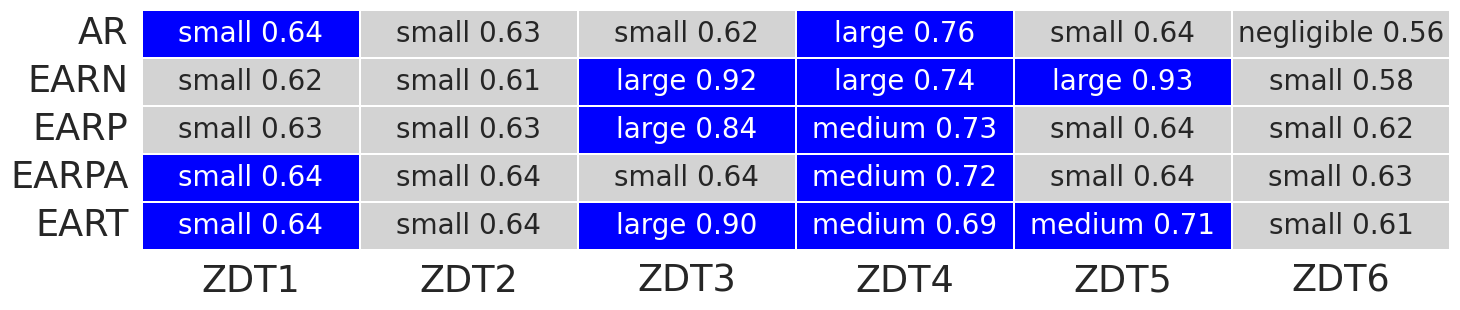

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
import numpy as np

# create the pivot table
pivot = pd.pivot_table(results[results['EAR'] != 'Puro'], values='dif', index=['EAR'], columns=['PROBLEM'])

# create a larger figure
plt.figure(figsize=(10*1.6, 4.5))

my_colors = ['blue', 'lightgrey', 'red']
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.33, 0.66, 1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

anotacao = [['small 0.64', 'small 0.63', 'small 0.62', 'large 0.76', 'small 0.64', 'negligible 0.56'],
['small 0.62', 'small 0.61', 'large 0.92', 'large 0.74', 'large 0.93', 'small 0.58'],
['small 0.63', 'small 0.63', 'large 0.84', 'medium 0.73', 'small 0.64', 'small 0.62'],
['small 0.64', 'small 0.64', 'small 0.64', 'medium 0.72', 'small 0.64', 'small 0.63'],
['small 0.64', 'small 0.64', 'large 0.90', 'medium 0.69', 'medium 0.71', 'small 0.61']]

# Create the heatmap with customized colors in the color bar
heatmap = sns.heatmap(pivot, annot=anotacao, fmt='', linewidths=0.3, annot_kws={'fontsize': 20},
                      vmin=0, vmax=1, cmap=my_cmap,
                      norm=my_norm, cbar=False)

# Set the font size
sns.set(font_scale=2.4)

# Rotate the y-axis labels to a horizontal orientation
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)


# Remove the x-axis label
heatmap.set_xlabel('')
heatmap.set_ylabel('')

# Adjust the spacing between cells
plt.tight_layout(pad=2)

# Save the figure
plt.savefig("HEATMAP_paper.pdf")

# Show the plot
plt.show()
